# Twitter Sentiment Analysis (NLP)

The author of the project is Kevin Molloy.

# Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df = pd.read_csv("../data/Twitter Sentiments.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the dataset

In [5]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [22]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

import html

# Clean up mojibake/emoji + common web artifacts
df['clean_tweet'] = (
    df['clean_tweet'].astype(str)
      .apply(html.unescape)                                 # &amp; → &
      .str.replace(r'http\S+|www\.\S+', ' ', regex=True)    # URLs
      .str.replace(r'[^\x00-\x7F]+', ' ', regex=True)       # drop non-ASCII (kills ðŸ˜… pieces)
      .str.replace('#', ' ', regex=False)                   # drop # symbol (keep the word)
      .str.replace(r'\bamp\b', ' ', regex=True)             # remove leftover 'amp'
      .str.replace(r'[^a-zA-Z]+', ' ', regex=True)          # letters only
      .str.lower()
      .str.strip()
)

# (optional) collapse multiple spaces once more
df['clean_tweet'] = df['clean_tweet'].str.replace(r'\s+', ' ', regex=True)

In [23]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [25]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [26]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cause they offer wheelchair...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with time
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [27]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, lyft, credit, cause, they, offer, whe...
2                              [bihday, your, majesty]
3                      [model, love, take, with, time]
4                    [factsguide, society, motivation]
Name: clean_tweet, dtype: object

In [28]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, lyft, credit, caus, they, offer, wheel...
2                              [bihday, your, majesti]
3                      [model, love, take, with, time]
4                          [factsguid, societi, motiv]
Name: clean_tweet, dtype: object

In [29]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit caus they offer wheelchair v...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi motiv


Exploratory Data Analysis

In [30]:
!pip install wordcloud

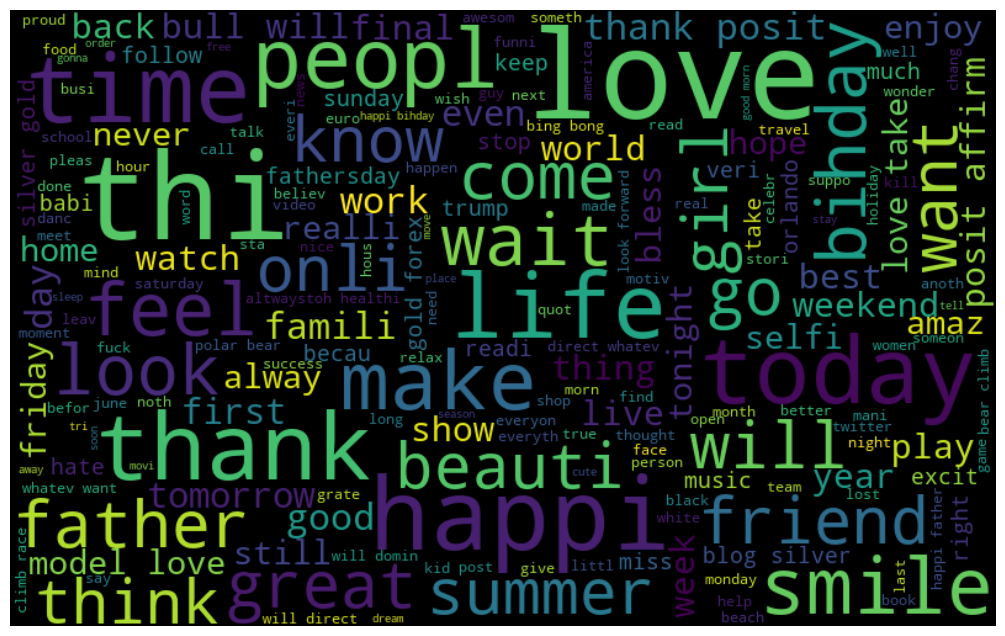

In [31]:
# visualise the common words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

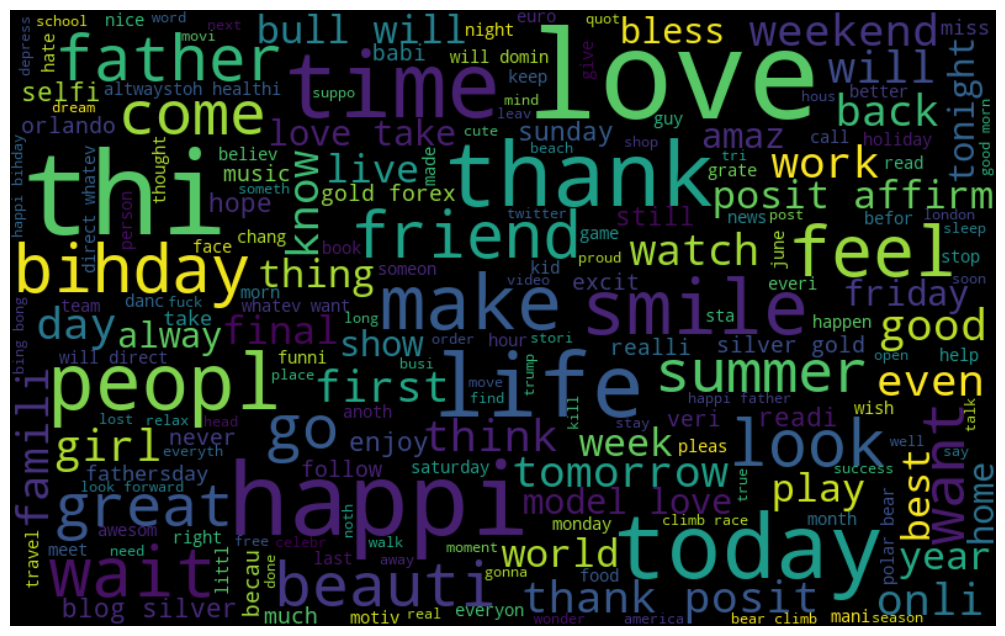

In [33]:
# Word cloud for the positive class (label == 0). Change 0 -> 1 for negative.
all_words = " ".join(df.loc[df['label'] == 0, 'clean_tweet'])

# Build the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

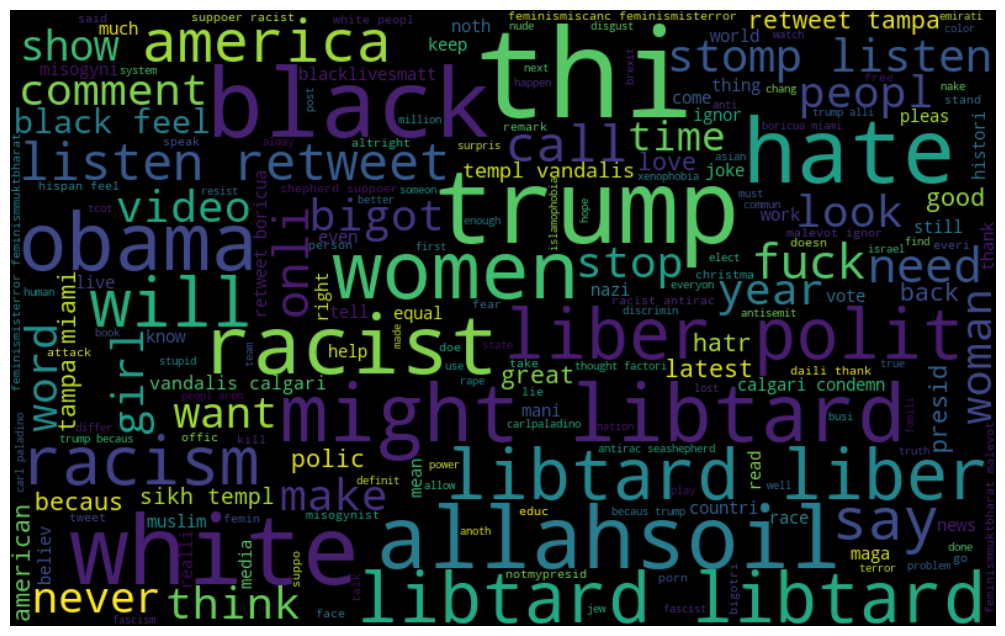

In [34]:
# Word cloud for the negative class (label == 1). Change 1 -> 0 for positive.
all_words = " ".join(df.loc[df['label'] == 1, 'clean_tweet'])

# Build the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Show it
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Clouds by Sentiment

- **What**: Most frequent words after cleaning, shown for each class (label 0 = non-toxic, label 1 = toxic).
- **Why**: Quick, visual sense of common vocabulary per class.
- **Note**: Built from clean_tweet.

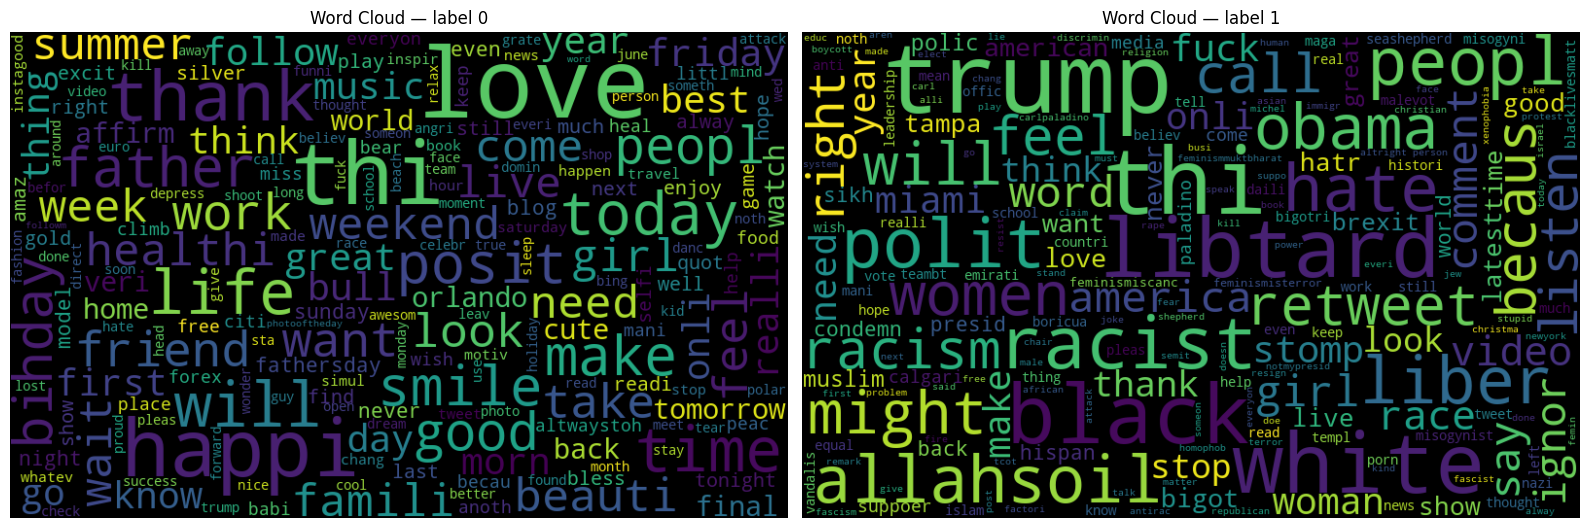

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# build big strings per class from the cleaned text
pos_text = " ".join(df.loc[df['label'] == 0, 'clean_tweet'].astype(str))
neg_text = " ".join(df.loc[df['label'] == 1, 'clean_tweet'].astype(str))

# make word clouds
wc_pos = WordCloud(width=800, height=500, random_state=42, max_font_size=100, collocations=False).generate(pos_text)
wc_neg = WordCloud(width=800, height=500, random_state=42, max_font_size=100, collocations=False).generate(neg_text)

# side-by-side view
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
axes[0].imshow(wc_pos, interpolation='bilinear'); axes[0].set_title('Word Cloud — label 0'); axes[0].axis('off')
axes[1].imshow(wc_neg, interpolation='bilinear'); axes[1].set_title('Word Cloud — label 1'); axes[1].axis('off')
plt.tight_layout(); plt.show()

Bigger words appear more often. Compare left vs right to spot class-specific language.

# Top Hashtags by Sentiment

- **What**: Most frequent hashtags in each class.
- **Why**: Shows topics/tags associated with each label.
- **Note**: Extracted from the raw tweet text (so # is present).

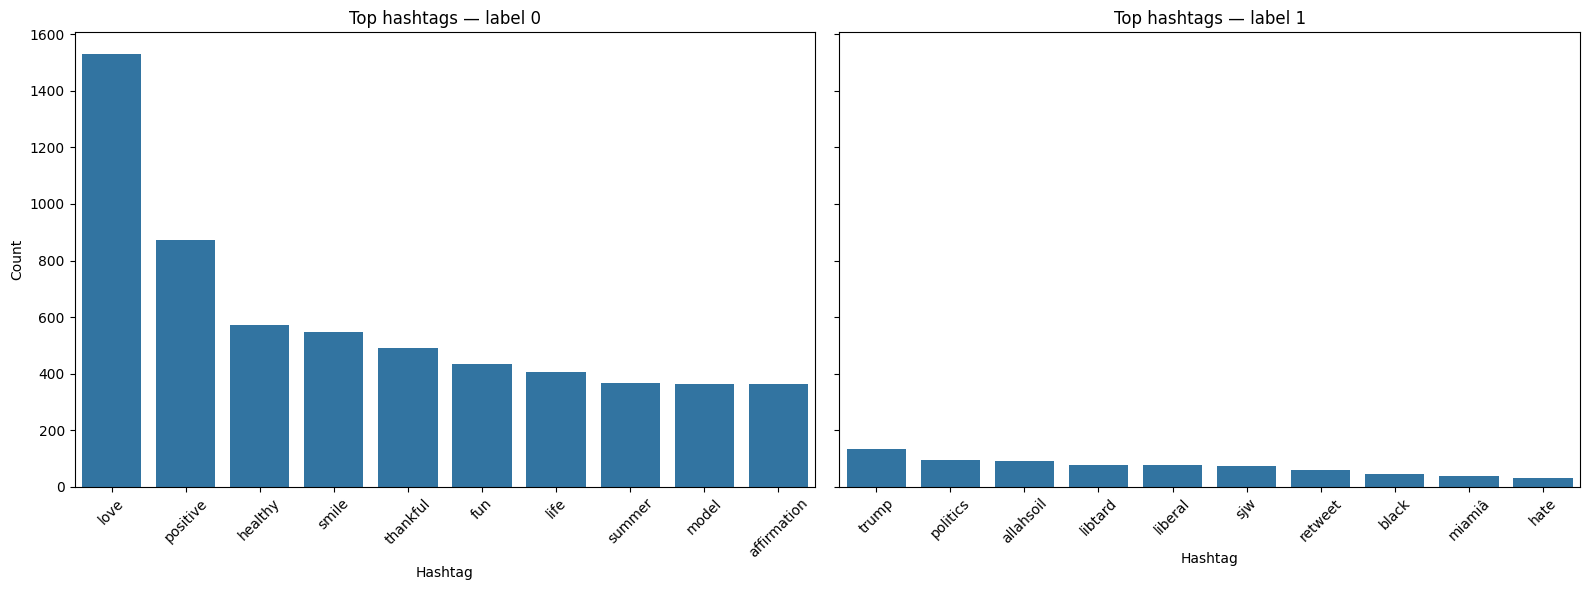

In [50]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# extract hashtags from raw tweets (not from clean_tweet)
pos_tags = df.loc[df['label'] == 0, 'tweet'].astype(str).str.findall(r"#(\w+)")
neg_tags = df.loc[df['label'] == 1, 'tweet'].astype(str).str.findall(r"#(\w+)")

# flatten and normalize
pos_tags = pos_tags.explode().dropna().str.lower()
neg_tags = neg_tags.explode().dropna().str.lower()

# top 10 per class (pandas-compatible)
top_pos = (
    pos_tags.value_counts().head(10)
    .rename_axis('Hashtag')
    .reset_index(name='Count')
)
top_neg = (
    neg_tags.value_counts().head(10)
    .rename_axis('Hashtag')
    .reset_index(name='Count')
)

# side-by-side bars
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.barplot(data=top_pos, x='Hashtag', y='Count', ax=axes[0])
axes[0].set_title('Top hashtags — label 0'); axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_neg, x='Hashtag', y='Count', ax=axes[1])
axes[1].set_title('Top hashtags — label 1'); axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(); plt.show()

Bar height = hashtag count in that class. Compare distributions across labels.

**Input Split**

In [51]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
# bow[0].toarray()

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# Model Training

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [55]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [56]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.4928909952606635

In [57]:
accuracy_score(y_test,pred)

0.9464397447128019

In [59]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = (pred_prob[:, 1] >= 0.3).astype(int)
f1_score(y_test, pred)

0.557504873294347

In [60]:
accuracy_score(y_test,pred)

0.943186084344888

In [61]:
pred_prob[0][1] >= 0.3

np.False_

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

print("Thresholded at 0.3")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Thresholded at 0.3
[[7251  181]
 [ 273  286]]
              precision    recall  f1-score   support

           0      0.964     0.976     0.970      7432
           1      0.612     0.512     0.558       559

    accuracy                          0.943      7991
   macro avg      0.788     0.744     0.764      7991
weighted avg      0.939     0.943     0.941      7991



# Conclusions

**Data & prep**
- 31,962 tweets with `id`, `label`, `tweet`.
- Cleaned text (handles removed, non-letters filtered, short words dropped), then stemming.

**Exploration**
- **Word clouds** (per label) show distinct vocab by class.
- **Hashtags** (extracted from raw `tweet`) highlight topics that cluster with each label.

**Baseline model**
- Bag-of-Words (1k features) + Logistic Regression.
- Default threshold gave **F1 ≈ 0.498**, **Accuracy ≈ 0.947**.
- Lowering the threshold to **0.3** improved **F1 → ≈ 0.555** with a small drop in accuracy.

**Why this matters**
- High accuracy with low F1 usually means **class imbalance** or the model favors the majority class.
- Tuning the **decision threshold** trades precision vs recall; choose it based on your goal (e.g., catching more toxic tweets → lower threshold).

**What I'd try next**
- Replace BoW with **TF-IDF** and add **bigrams**.
- Keep hashtags as a separate feature (they’re informative).
- Use **stratified CV** and pick threshold by **PR curve**.
- Try **LogReg with class_weight='balanced'** or **LinearSVC**.